In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

In [2]:
# 병합한 채널정보 파일을 불러온다.
df1 = pd.read_csv('open/train/2018_train_채널정보_segment병합.csv')
df1

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,...,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,Segment
0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,2,...,0,22,221,6,Android,0,0,0,0,D
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,1,...,0,0,0,0,Android,11,6,5,5,C
3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,2,...,0,23,219,6,Android,0,0,0,0,D
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,Android,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,1,NaN,0,0,0,0,D
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,C
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E


### 당월 IB 문의건수

In [4]:
# df1은 이미 불러온 상태이므로, Segment별 평균 분석만 진행
ib_columns_b0m = [
    "IB문의건수_APP_B0M", "IB문의건수_BL_B0M", "IB문의건수_CA_B0M", "IB문의건수_CL_RV_B0M",
    "IB문의건수_CS_B0M", "IB문의건수_SMS_B0M", "IB문의건수_결제_B0M", "IB문의건수_결제일변경_B0M",
    "IB문의건수_명세서_B0M", "IB문의건수_부대서비스_B0M", "IB문의건수_분실도난_B0M", "IB문의건수_비밀번호_B0M",
    "IB문의건수_사용승인내역_B0M", "IB문의건수_선결제_B0M", "IB문의건수_정보변경_B0M", "IB문의건수_카드발급_B0M",
    "IB문의건수_포인트_B0M", "IB문의건수_한도_B0M", "IB문의건수_할부_B0M"
]

ib_segment_mean = df1.groupby("Segment")[ib_columns_b0m].mean().T
ab_segment_mean = ib_segment_mean[["A", "B"]]
ab_segment_mean

Segment,A,B
IB문의건수_APP_B0M,0.000000,0.000000
IB문의건수_BL_B0M,0.000000,0.000000
IB문의건수_CA_B0M,0.000000,0.000000
IB문의건수_CL_RV_B0M,0.000000,0.000000
IB문의건수_CS_B0M,0.000000,0.000000
IB문의건수_SMS_B0M,0.000000,0.000000
IB문의건수_결제_B0M,0.000000,0.000000
IB문의건수_결제일변경_B0M,0.000000,0.000000
IB문의건수_명세서_B0M,0.000000,0.000000
IB문의건수_부대서비스_B0M,0.000000,0.000000


In [17]:
# 다 수치형이다. 위 값에 오류없음
df1[ib_columns_b0m].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 19 columns):
 #   Column             Dtype
---  ------             -----
 0   IB문의건수_APP_B0M     int64
 1   IB문의건수_BL_B0M      int64
 2   IB문의건수_CA_B0M      int64
 3   IB문의건수_CL_RV_B0M   int64
 4   IB문의건수_CS_B0M      int64
 5   IB문의건수_SMS_B0M     int64
 6   IB문의건수_결제_B0M      int64
 7   IB문의건수_결제일변경_B0M   int64
 8   IB문의건수_명세서_B0M     int64
 9   IB문의건수_부대서비스_B0M   int64
 10  IB문의건수_분실도난_B0M    int64
 11  IB문의건수_비밀번호_B0M    int64
 12  IB문의건수_사용승인내역_B0M  int64
 13  IB문의건수_선결제_B0M     int64
 14  IB문의건수_정보변경_B0M    int64
 15  IB문의건수_카드발급_B0M    int64
 16  IB문의건수_포인트_B0M     int64
 17  IB문의건수_한도_B0M      int64
 18  IB문의건수_할부_B0M      int64
dtypes: int64(19)
memory usage: 347.9 MB


In [10]:
# A,B 개수를 알아본다.
df1['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

In [14]:
# A 또는 B인 고객 중, 문의 기록이 있는 사람만 필터링
df1_ab = df1[df1['Segment'].isin(['A', 'B'])]
df1_ab[ib_columns_b0m].sum()

IB문의건수_APP_B0M       0
IB문의건수_BL_B0M        0
IB문의건수_CA_B0M        0
IB문의건수_CL_RV_B0M     0
IB문의건수_CS_B0M        0
IB문의건수_SMS_B0M       0
IB문의건수_결제_B0M        0
IB문의건수_결제일변경_B0M     0
IB문의건수_명세서_B0M       0
IB문의건수_부대서비스_B0M     0
IB문의건수_분실도난_B0M      0
IB문의건수_비밀번호_B0M      0
IB문의건수_사용승인내역_B0M    0
IB문의건수_선결제_B0M       7
IB문의건수_정보변경_B0M      0
IB문의건수_카드발급_B0M      0
IB문의건수_포인트_B0M       0
IB문의건수_한도_B0M        0
IB문의건수_할부_B0M        0
dtype: int64

## 🔍 분석 결과 요약

- Segment A 또는 B에 속한 고객들에 대해, **IB문의건수(B0M)** 컬럼들의 합계를 계산한 결과 **하나 빼고 모두 0**으로 나타났습니다.
- 즉, **당월(B0M) 기준으로는 A, B 세그먼트 고객 중 IB 문의를 한 사람이 거의 없었습니다.**

---

## ✅ 결론 및 제안

### 1. 당월(B0M) 데이터는 A/B 세그먼트 분석에 부적절
- A, B 세그먼트는 본래 희소하고
- B0M은 단 1개월치 데이터이기 때문에
- → **A/B 고객에 대한 문의 건수가 거의 존재하지 않음**
- → 분석 결과가 모두 0이거나 무의미한 값이 됨

### 2. R6M(최근 6개월) 데이터를 사용하는 것이 적절함
- IB문의건수_R6M 컬럼은 **누적 문의 건수**를 담고 있어
- A, B 고객도 일정 수준의 문의 기록을 남겼을 가능성이 높음
- **희소한 세그먼트에 대한 패턴 분석**에 더욱 유리

---

## 📌 다음 단계 제안

- `IB문의건수_*_R6M` 컬럼 리스트를 구성하고
- 동일한 방식으로 Segment A, B에 대한 문의 건수 평균 분석을 진행
- 그 결과를 기반으로 A/B 특화 변수 후보 도출


In [22]:
# R6M 기준 IB문의건수 컬럼 자동 추출
ib_columns_r6m = [col for col in df1.columns if col.startswith("IB문의건수_") and col.endswith("_R6M")]

# Segment별 평균 문의건수 계산
ib_segment_r6m_mean = df1.groupby("Segment")[ib_columns_r6m].mean().T

# Segment A, B만 추출
ab_segment_r6m_mean = ib_segment_r6m_mean[["A", "B"]]
ab_segment_r6m_mean

Segment,A,B
IB문의건수_사용승인내역_R6M,0.309671,0.361111
IB문의건수_한도_R6M,0.012346,0.041667
IB문의건수_선결제_R6M,0.296296,0.687500
IB문의건수_결제_R6M,0.004115,0.083333
IB문의건수_할부_R6M,0.000000,0.000000
IB문의건수_정보변경_R6M,0.052469,0.027778
IB문의건수_결제일변경_R6M,0.002058,0.000000
IB문의건수_명세서_R6M,0.000000,0.000000
IB문의건수_비밀번호_R6M,0.000000,0.000000
IB문의건수_SMS_R6M,0.000000,0.000000


In [42]:
# A 또는 B인 고객 중, 문의 기록이 있는 사람만 필터링
df1_ab = df1[df1['Segment'].isin(['A', 'B'])]
df1_ab[ib_columns_r6m].sum()

IB문의건수_사용승인내역_R6M    353
IB문의건수_한도_R6M         18
IB문의건수_선결제_R6M       387
IB문의건수_결제_R6M         16
IB문의건수_할부_R6M          0
IB문의건수_정보변경_R6M       55
IB문의건수_결제일변경_R6M       2
IB문의건수_명세서_R6M         0
IB문의건수_비밀번호_R6M        0
IB문의건수_SMS_R6M         0
IB문의건수_APP_R6M         0
IB문의건수_부대서비스_R6M       0
IB문의건수_포인트_R6M         0
IB문의건수_카드발급_R6M       34
IB문의건수_BL_R6M          0
IB문의건수_분실도난_R6M       13
IB문의건수_CA_R6M          8
IB문의건수_CL_RV_R6M       9
IB문의건수_CS_R6M          0
dtype: int64

### 개별 컬럼 확인용

In [14]:
pd.options.display.float_format = '{:.5f}'.format
# 1. 분석 대상 컬럼 리스트 (컨택건수 관련 전체)
ib_columns = [
    "IB문의건수_CA_R6M",
    "IB문의건수_CL_RV_R6M",
    "IB문의건수_결제_R6M",
    "IB문의건수_결제일변경_R6M",
    "IB문의건수_분실도난_R6M",
    "IB문의건수_사용승인내역_R6M",
    "IB문의건수_선결제_B0M",
    "IB문의건수_선결제_R6M",
    "IB문의건수_정보변경_R6M",
    "IB문의건수_카드발급_R6M",
    "IB문의건수_한도_R6M"
]


# 2. Segment 필터링
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
ib_columns_mean = df1_seg.groupby("Segment")[ib_columns].mean().T

# 4. B0M, R6M 구분
ib_columns_B0M = [col for col in ib_columns if "_B0M" in col]
ib_columns_R6M = [col for col in ib_columns if "_R6M" in col]

# 5. 출력
display(ib_columns_mean.loc[ib_columns_B0M])
display(ib_columns_mean.loc[ib_columns_R6M])

Segment,A,B,C,D,E
IB문의건수_선결제_B0M,0.00309,0.02778,0.01040,0.00655,0.00188


Segment,A,B,C,D,E
IB문의건수_CA_R6M,0.00617,0.01389,0.00132,0.00062,0.00014
IB문의건수_CL_RV_R6M,0.00926,0.00000,0.01320,0.02115,0.01759
IB문의건수_결제_R6M,0.00412,0.08333,0.01081,0.00585,0.00193
IB문의건수_결제일변경_R6M,0.00206,0.00000,0.00858,0.01118,0.01176
IB문의건수_분실도난_R6M,0.00926,0.02778,0.01599,0.01023,0.00421
IB문의건수_사용승인내역_R6M,0.30967,0.36111,0.22347,0.17187,0.07754
IB문의건수_선결제_R6M,0.29630,0.68750,0.34960,0.29259,0.12641
IB문의건수_정보변경_R6M,0.05247,0.02778,0.02255,0.02058,0.01455
IB문의건수_카드발급_R6M,0.02469,0.06944,0.02728,0.01933,0.00970
IB문의건수_한도_R6M,0.01235,0.04167,0.01666,0.01382,0.00822


### 개별확인용 - 수치형을 평균으로 먼저봤다면 실제 데이터 형태를 확인해서 비교

In [91]:
df1['IB문의건수_한도_R6M'].value_counts().sort_index()

IB문의건수_한도_R6M
0    2388620
2      11380
Name: count, dtype: int64

In [93]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["IB문의건수_한도_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

IB문의건수_한도_R6M,0,2
Segment,,
A,966,6
B,141,3
C,126527,1063
D,346829,2413
E,1914157,7895


IB문의건수_한도_R6M,0,2
Segment,,
A,0.99383,0.00617
B,0.97917,0.02083
C,0.99167,0.00833
D,0.99309,0.00691
E,0.99589,0.00411


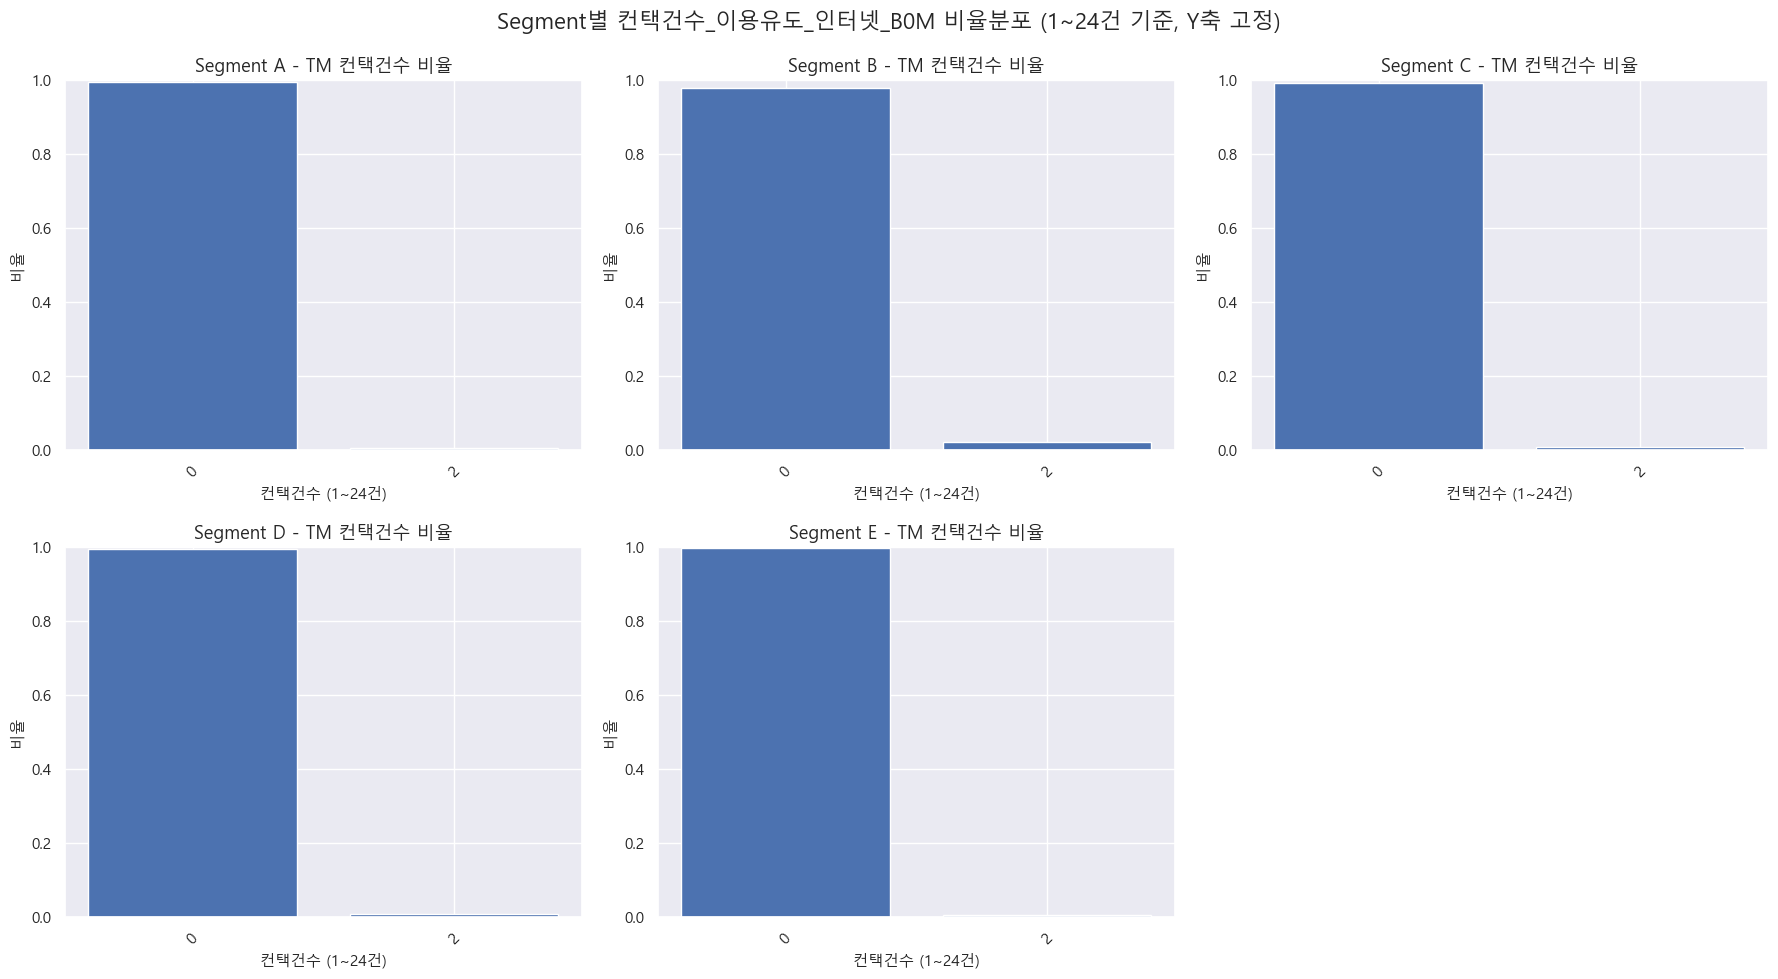

In [95]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:12]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()


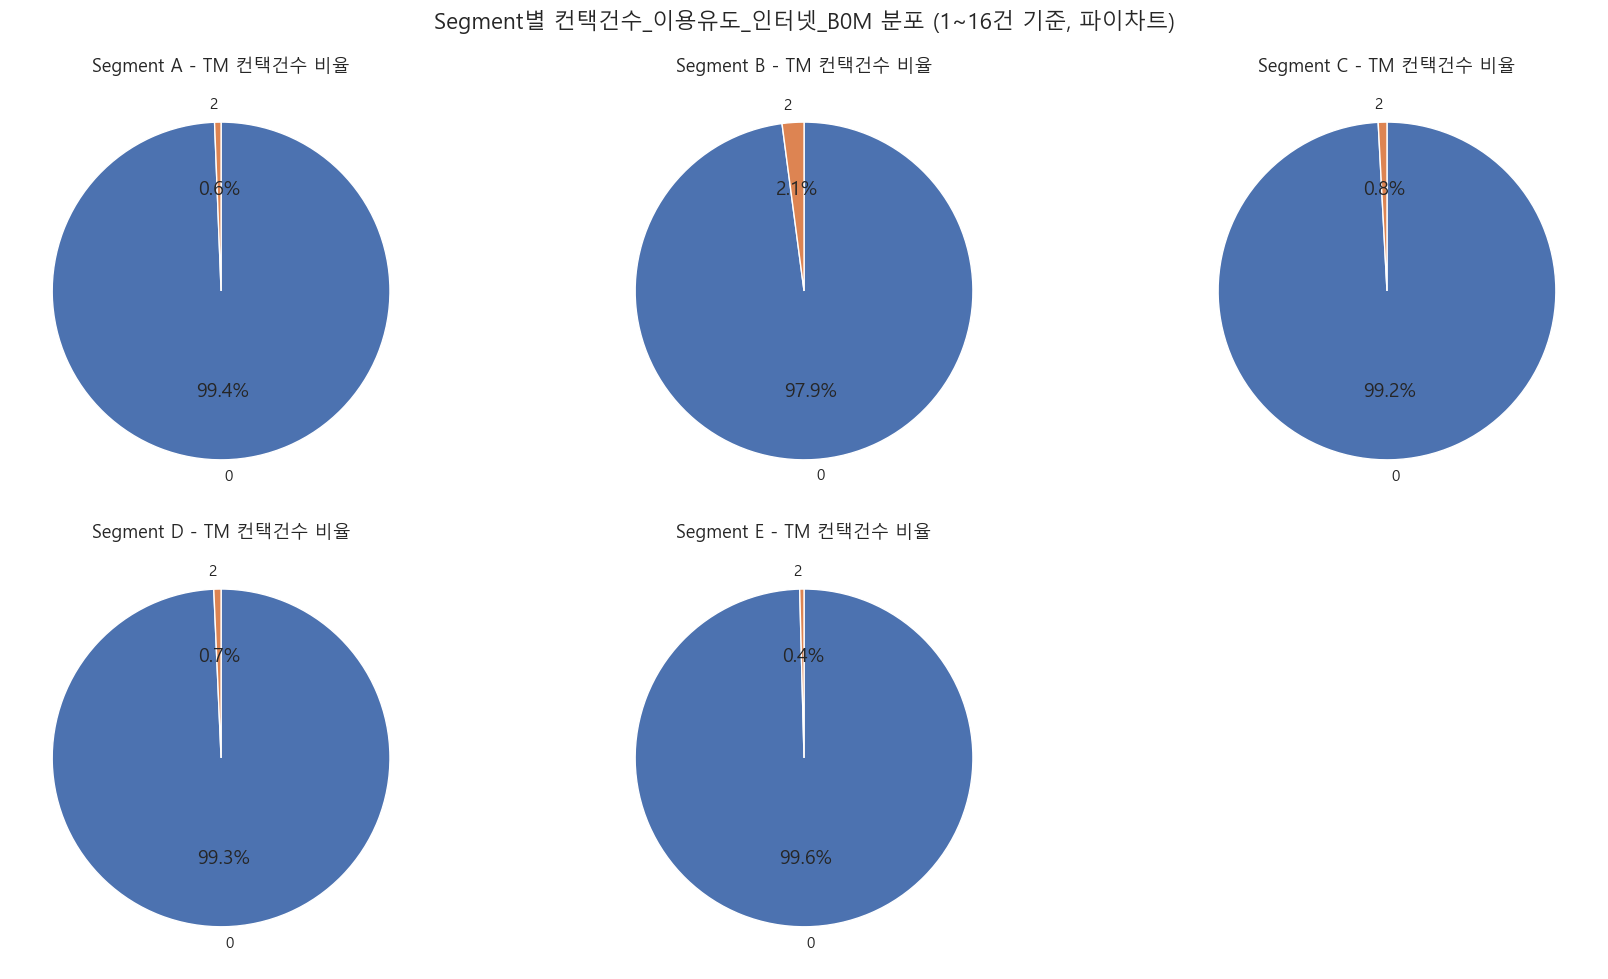

In [97]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:9]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 분포 (1~16건 기준, 파이차트)", fontsize=16)
plt.tight_layout()
plt.show()


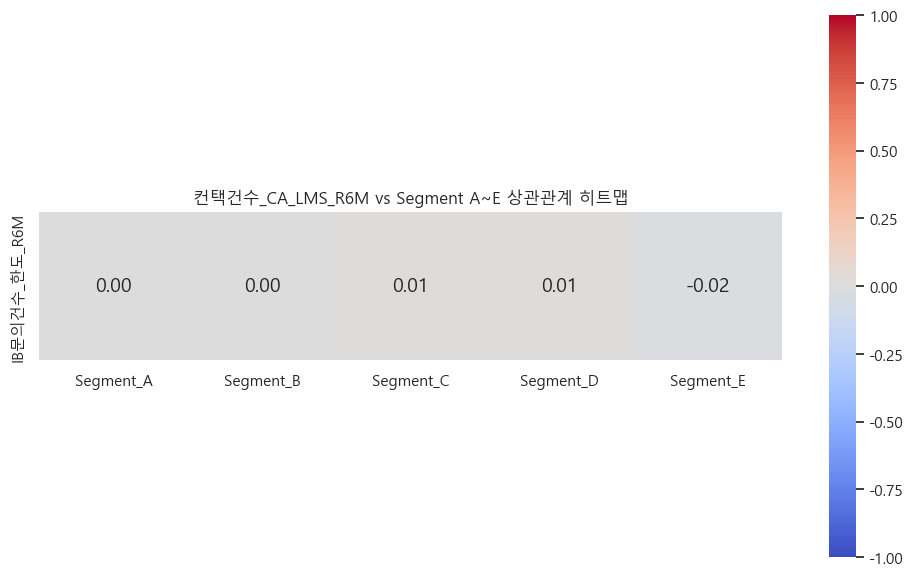

In [99]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "IB문의건수_한도_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("컨택건수_CA_LMS_R6M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

- 해당 달(당월)에는 A, B 고객 중 아무도 IB문의 건을 남기지 않았다는 의미

## ✅ Segment A vs B: IB문의건수 (최근 6개월, R6M 기준) 인사이트 요약

| 항목 | Segment A | Segment B | 차이점 요약 |
|------|-----------|-----------|--------------|
| **선결제** | 0.2963 | **0.6875** | B가 2배 이상 높음 → **B는 선결제 문의 비중이 높다** |
| **결제** | 0.0411 | **0.0833** | B가 2배 → **결제 관련 문의도 B가 더 많음** |
| **사용승인내역** | 0.3097 | 0.3611 | B가 소폭 높음 |
| **카드발급** | 0.0247 | **0.0694** | B가 약 3배 → **신규 카드 발급 관련 문의 가능성** |
| **정보변경** | **0.0525** | 0.0278 | A가 2배 → **A는 개인정보 변경이나 계정 관리에 적극적** |

---

## 📌 세그먼트별 행동 특성 해석

### ▶ B 세그먼트 고객
- **금융 거래 중심의 문의**(선결제, 결제, 카드발급 등) 비중이 높음
- **신용/대출/연체 이슈 또는 잦은 거래**가 있을 수 있음
- → **모니터링 대상 고객**이거나 **고객센터 의존도 높은 고객군**

### ▶ A 세그먼트 고객
- **정보변경** 문의가 높은 편 → **계정 관리나 디지털 채널 사용에 익숙**
- 문의 항목이 비교적 고르게 분포되어 있음
- → **VIP 고객**, 또는 **디지털 친화 고객군** 가능성

---

## 🔍 다음 분석 제안
- 평균값이 큰 순서대로 상위 항목 **시각화 (barplot)** 진행
- Segment 전체(C~E 포함) 대비 **A/B 세그먼트 특이성 분석**
- 향후 모델링 시 위 항목들을 **Segment A/B 식별용 주요 피처**로 활용


## 📌 분석 데이터 구조에 대한 설명 및 해석 시 유의사항

이번 분석에 사용된 데이터는 2018년 7월부터 12월까지 월별로 수집된 고객 정보를 병합한 형태입니다.  
각 고객은 한 달에 한 번씩 스냅샷 형태의 데이터로 기록되었으며, 총 6개월 동안 **동일 고객이 여러 번 등장**합니다.

특히 `IB문의건수_*_R6M` 컬럼은 "해당 월을 기준으로 최근 6개월간의 누적 문의 건수"를 의미합니다.  
따라서 예를 들어 7월의 R6M은 2 ~ 7월, 8월의 R6M은 3 ~ 8월 데이터를 포함하며, **기간이 일부 중복**됩니다.

---

### ✅ 분석 방식에 대한 설명

이번 분석에서는 고객별 여러 개의 월별 데이터를 모두 포함한 상태로,  
Segment별(R6M 기준) 평균 문의 건수를 계산하여 **전체적인 경향성 파악**에 중점을 두었습니다.

이러한 방식은 다음과 같은 장점을 가집니다:

- A/B Segment의 전반적인 특성을 파악하는 데 용이
- 샘플 수가 적은 A, B 세그먼트에 대한 평균 기반 비교가 가능
- 시계열 변화를 무시하고 **'평균적 행동 패턴'에 집중**할 수 있음

---

### ⚠️ 해석 시 유의할 점

- R6M 컬럼은 누적 값이므로, 단순 평균값이 **정확한 횟수나 빈도를 의미하지 않을 수 있음**
- 동일 고객의 데이터가 여러 번 포함되어 있어 **일부 특성이 과대표현**될 수 있음
- 시계열적으로 행동 변화가 있을 경우 해당 정보는 이 분석에 **반영되지 않음**

---

### 💡 결론

> 본 분석은 A/B Segment에 대한 **대표적 행동 패턴의 탐색**을 목표로 하며,  
> 실제 운영 적용 시에는 **고객당 1개 행으로 축소하거나, 특정 시점 데이터로 필터링**하여  
> 분석을 반복하는 것도 좋은 보완 전략이 될 수 있습니다.

### 빼도 될것 같은 컬럼 (당월, 6개월 두 범위에서 A,B 값이 다 0)
- IB문의건수_명세서_R6M
- IB문의건수_할부_R6M
- IB문의건수_비밀번호_R6M
- IB문의건수_SMS_R6M	
- IB문의건수_APP_R6M	
- IB문의건수_부대서비스_R6M
- IB문의건수_포인트_R6M
- IB문의건수_BL_R6M
- IB문의건수_CS_R6M

### IB상담건수

In [36]:
# VOC 관련 B0M 컬럼 리스트
ib_voc_columns_b0m = [
    "IB상담건수_VOC_B0M",
    "IB상담건수_VOC민원_B0M",
    "IB상담건수_VOC불만_B0M",
    "IB상담건수_금감원_B0M"
]

# Segment A, B만 필터링
df_ab = df1[df1["Segment"].isin(["A", "B"])]

# Segment별 평균 계산
ab_voc_segment_b0m_mean = df_ab.groupby("Segment")[ib_voc_columns_b0m].mean().T

# 결과 출력
ab_voc_segment_b0m_mean


Segment,A,B
IB상담건수_VOC_B0M,0.0,0.0
IB상담건수_VOC민원_B0M,0.0,0.0
IB상담건수_VOC불만_B0M,0.0,0.0
IB상담건수_금감원_B0M,0.0,0.0


In [50]:
df1_ab = df1[df1['Segment'].isin(['A', 'B'])]
df1_ab[ib_voc_columns_b0m].sum()

IB상담건수_VOC_B0M      0
IB상담건수_VOC민원_B0M    0
IB상담건수_VOC불만_B0M    0
IB상담건수_금감원_B0M      0
dtype: int64

In [38]:
# VOC 관련 R6M 컬럼 리스트
ib_voc_columns_r6m = [
    "IB상담건수_VOC_R6M",
    "IB상담건수_VOC민원_R6M",
    "IB상담건수_VOC불만_R6M",
    "IB상담건수_금감원_R6M"
]

# Segment A, B 필터링
df_ab = df1[df1["Segment"].isin(["A", "B"])]

# Segment별 평균 계산
ab_voc_segment_r6m_mean = df_ab.groupby("Segment")[ib_voc_columns_r6m].mean().T

# 결과 출력
ab_voc_segment_r6m_mean

Segment,A,B
IB상담건수_VOC_R6M,0.0,0.0
IB상담건수_VOC민원_R6M,0.0,0.0
IB상담건수_VOC불만_R6M,0.0,0.0
IB상담건수_금감원_R6M,0.0,0.0


In [46]:
ib_voc_columns_r6m = [
    "IB상담건수_VOC_R6M",
    "IB상담건수_VOC민원_R6M",
    "IB상담건수_VOC불만_R6M",
    "IB상담건수_금감원_R6M"
]

df1_ab = df1[df1['Segment'].isin(['A', 'B'])]
df1_ab[ib_voc_columns_r6m].sum()

IB상담건수_VOC_R6M      0
IB상담건수_VOC민원_R6M    0
IB상담건수_VOC불만_R6M    0
IB상담건수_금감원_R6M      0
dtype: int64

## 📉 상담건수(R6M 기준) 분석 결과 요약

이번 분석에서는 Segment A, B 고객을 대상으로 `IB상담건수_*_R6M` 항목들의 평균 및 총합을 계산하였습니다.

그러나 그 결과, 모든 항목에서 **평균값이 0**, **총합도 0**으로 나타났습니다.

---

### 🔍 해석

- `IB상담건수_VOC_R6M`, `IB상담건수_불만_R6M`, `IB상담건수_금감원_R6M` 등 모든 항목에서  
  Segment A, B 고객의 최근 6개월간 상담 기록이 **단 한 건도 존재하지 않음**
- 따라서 해당 컬럼들은 A, B 세그먼트의 특성을 파악하는 데 **유의미한 분석 지표가 되지 못함**

---

### ❌ 결론

> 해당 상담건수 컬럼들은 Segment A, B에 대해 **모두 0값으로 채워져 있어 분석적 가치가 낮음**.  
> 이후 분석에서는 보다 분산이 존재하는 지표들에 초점을 맞추는 것이 적절함.


### 빼도 될것 같은 컬럼 (당월, 6개월 두 범위에서 A,B 값이 다 0)
- IB상담건수_VOC_B0M
- IB상담건수_VOC_R6M
- IB상담건수_VOC민원_B0M
- IB상담건수_VOC민원_R6M
- IB상담건수_VOC불만_B0M
- IB상담건수_VOC불만_R6M
- IB상담건수_금감원_B0M
- IB상담건수_금감원_R6M